# Week 5 Notebook - Multilayered Perceptrons

## Multilayered Perceptrons for Regression

In [36]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection

np.random.seed = 47

advertising = pd.read_csv('Advertising.csv',usecols=(1,2,3,4))

advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

#Just a CSV of Sports Illustrator Covers, describing which sports are on each cover
#https://data.world/crowdflower/sports-illustrated-covers/workspace/file?filename=SI-Cover-by-Sport-DFE.csv
fun = pd.read_csv('sports.csv', usecols=(1,2,3,4))

fun.head()

X = np.array(fun['Baseball']).reshape(-1,1)
y = np.array(fun['Grand Total'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=9)

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

fun.head()



C:\Users\Saena\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Saena\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Saena\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,American football,Baseball,Basketball,Grand Total
0,2,2,1.0,20
1,7,9,NaN,52
2,8,13,1.0,53
3,4,9,3.0,52
4,4,12,2.0,52


In [40]:
X = np.array(advertising['TV']).reshape(-1,1)
y = np.array(advertising['Sales'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=9)

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

In [18]:
# Implement your code here
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

# Model 
model.add(Dense(output_dim=2, input_shape=[X_train_scaled.shape[1]], 
                activation='sigmoid'))
model.add(Dense(output_dim=1, activation='linear'))

# Slightly better model.
# model.add(Dense(output_dim=4, input_shape=[X_train_scaled.shape[1]], 
#                 activation='relu'))
# model.add(Dense(output_dim=2, activation='sigmoid'))
# model.add(Dense(output_dim=1, activation='linear'))


# Compile model
sgd = SGD(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [19]:
# Fit the model
history = model.fit(X_train_scaled, y_train.reshape(-1,1), batch_size = 256,
          nb_epoch = 10000, verbose=0, validation_data=(X_test_scaled,y_test.reshape(-1,1)))

RMSE Loss after final iteration:  3.40820032683


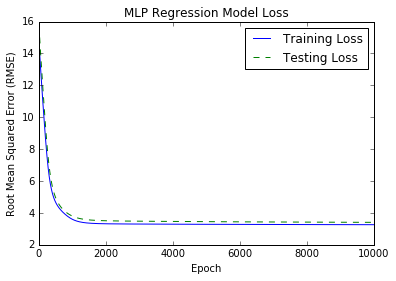

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(np.sqrt(history.history['loss']))
plt.plot(np.sqrt(history.history['val_loss']), 'g--')
plt.title('MLP Regression Model Loss')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "RMSE Loss after final iteration: ", np.sqrt(history.history['val_loss'][-1])
plt.show()

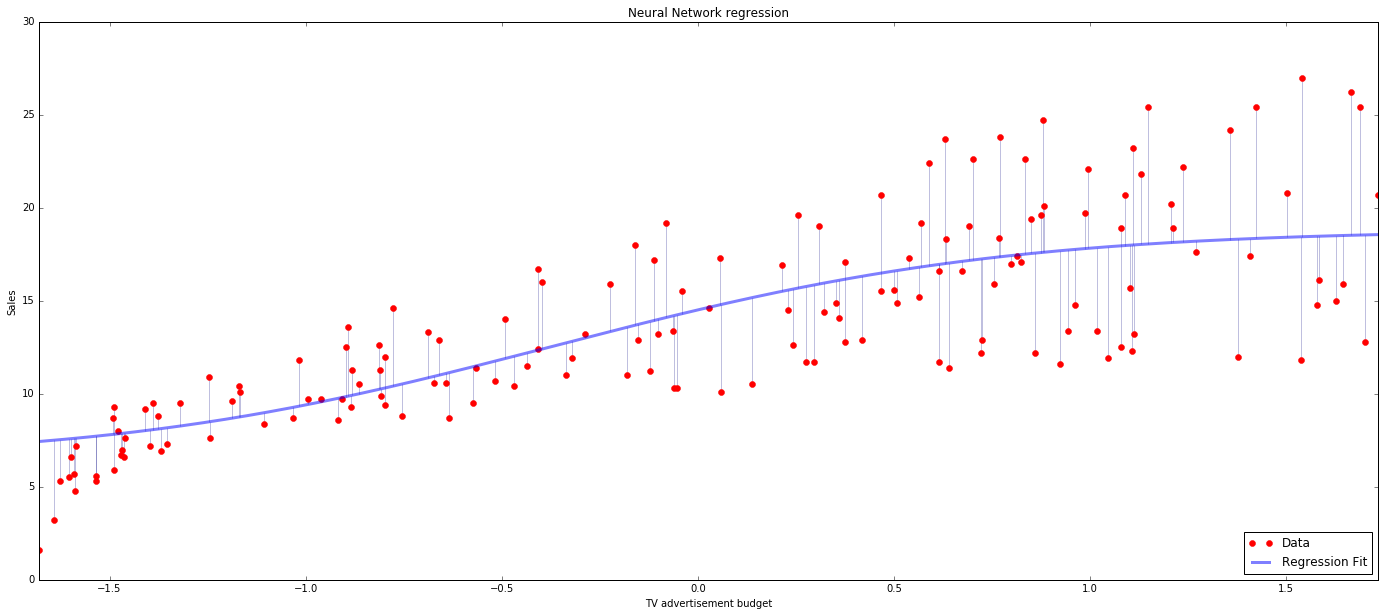

In [21]:
from matplotlib.collections import LineCollection

y_predicted = model.predict(X_train_scaled)
N = len(y_train)

segments = [[[X_train_scaled[i], y_train[i]], [X_train_scaled[i], y_predicted[i]]] for i in range(N)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y_train)))
lc.set_alpha(0.5)
lc.set_linewidths(0.5 * np.ones(len(y_train)))

fig = plt.figure(figsize=[24,10])
# plot the training data
plt.plot(X_train_scaled, y_train, 'r.', markersize=12)
# plot the prediction line
x_lin = np.linspace(X_train_scaled.min(),X_train_scaled.max(),1000).reshape(-1,1)
plt.plot(x_lin, model.predict(x_lin), color='blue',linewidth=3,alpha=0.5)
# plot the redisuals
plt.gca().add_collection(lc)

plt.xlim([X_train_scaled.min(),X_train_scaled.max()])
plt.xlabel('TV advertisement budget')
plt.ylabel('Sales')
plt.legend(('Data', 'Regression Fit'), loc='lower right')
plt.title('Neural Network regression')

# plot the regression line
plt.show()

### KDD Cup 1999 Network Security Dataset

In this next example, we will look at the KDD Cup 1999 dataset. (10% subset)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import preprocessing, cross_validation

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2,l1
from keras.optimizers import SGD
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

np.random.seed = 47

data = pd.read_csv('kddcup.data_10_percent.csv',header=None)
dataCols = ['duration','protocol_type','service','flag','src_bytes','dst_bytes',
    'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
    'root_shell','su_attempted','num_root','num_file_creations','num_shells',
    'num_access_files','num_outbound_cmds','is_host_login','is_guest_login',
    'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
    'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate','target']
data.columns = dataCols

print("Shape: ", data.shape)
print("Targets: ", data['target'].unique())
data = data.reindex(np.random.permutation(data.index)).reset_index(drop=True)

target = data['target'].copy()
data = data.drop('target', axis=1)

data.head()

('Shape: ', (494021, 42))
('Targets: ', array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object))


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
1,0,tcp,smtp,SF,1447,334,0,0,0,0,...,95,77,0.81,0.04,0.01,0.00,0.0,0.0,0.0,0.0
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
3,0,tcp,http,SF,227,5131,0,0,0,0,...,42,255,1.00,0.00,0.02,0.05,0.0,0.0,0.0,0.0
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0


In [8]:
discreteCols = ['protocol_type','service','flag']
dataDummies = pd.get_dummies(data[discreteCols])
data = data.drop(discreteCols, axis=1)

data = dataDummies.join(data)
data.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,95,77,0.81,0.04,0.01,0.00,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42,255,1.00,0.00,0.02,0.05,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0


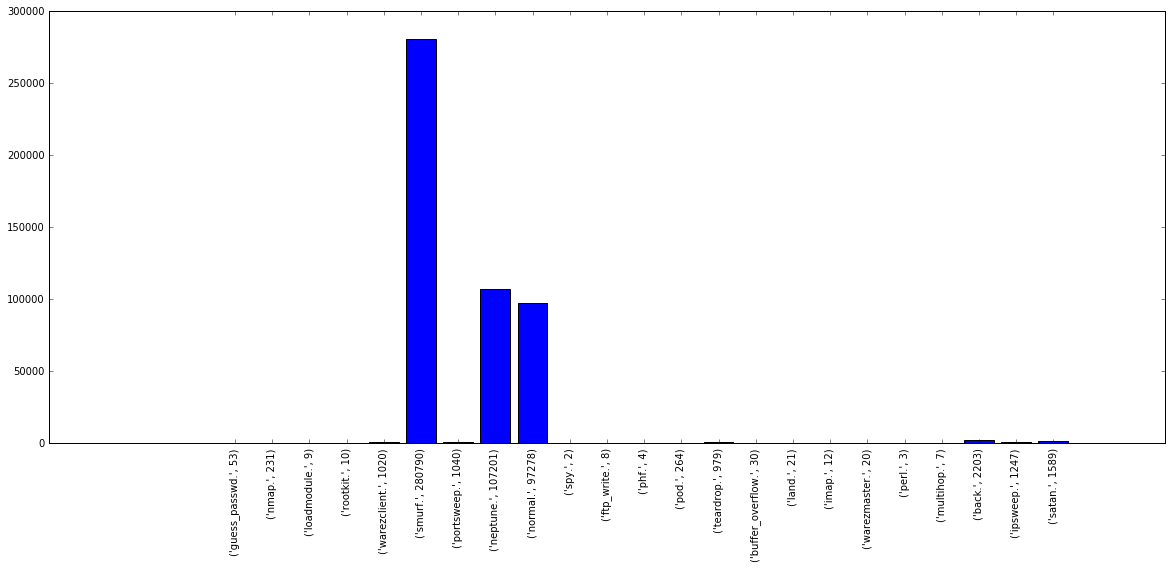

In [9]:
posteriorCount = {i:(target==i).sum() for i in target.unique()}
fig = plt.figure(figsize=(20,8))
plt.bar(range(len(posteriorCount)), posteriorCount.values(), align='center')
plt.xticks(range(len(posteriorCount)), zip(posteriorCount.keys(),posteriorCount.values()), rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.show()

In [10]:
targetDummies = pd.get_dummies(target)
targetFull = targetDummies
targetFull.head()

,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,...,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
target[target != 'normal.'] = 1.0
target[target == 'normal.'] = 0.0
target.head()

0    1
1    0
2    1
3    0
4    1
Name: target, dtype: object

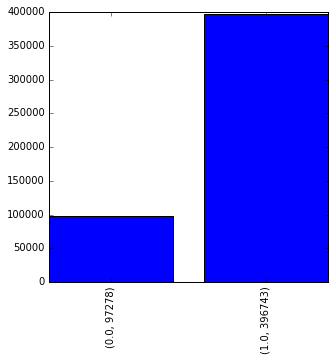

In [12]:
posteriorCount = {i:(target==i).sum() for i in target.unique()}
fig = plt.figure(figsize=(5,5))
plt.bar(range(len(posteriorCount)), posteriorCount.values(), align='center')
plt.xticks(range(len(posteriorCount)), zip(posteriorCount.keys(),posteriorCount.values()), rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.show()

In [13]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    data, target, test_size=0.5, random_state=50)

X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(247010, 118)
(247010,)
(247011, 118)
(247011,)


In [14]:
# standardize the data
# turn off the error message, we're not setting indivdual values.
pd.options.mode.chained_assignment = None

toStandardize = ['src_bytes', 'dst_bytes', 'count', 'srv_count',
                 'dst_host_count', 'dst_host_srv_count']
stdscaler = preprocessing.MinMaxScaler().fit(X_train[toStandardize])
X_train[toStandardize] = stdscaler.transform(X_train[toStandardize])
X_test[toStandardize]  = stdscaler.transform(X_test[toStandardize])

X_train.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.074510,0.07,0.06,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.000000,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.000000,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.000000,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.039216,0.04,0.07,0.0,0.0,1.0,1.0,0.0,0.0


### Logistic Regression Model on the KDD Cup 1999 dataset

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

# Model
model.add(Dense(output_dim=1, input_shape=[X_train.shape[1]], 
                activation='sigmoid', W_regularizer=l2(0.001)))

# Compile model
sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

In [16]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_3 (Dense)                  (None, 1)             119         dense_input_2[0][0]              
Total params: 119
____________________________________________________________________________________________________


In [17]:
# Fit the model
history = model.fit(X_train.as_matrix(), y_train.as_matrix().reshape(-1,1), batch_size = 256,
          nb_epoch = 15, verbose=2, validation_data=(X_test.as_matrix(),y_test.as_matrix().reshape(-1,1)))

Train on 247010 samples, validate on 247011 samples
Epoch 1/15
1s - loss: 0.1017 - val_loss: 0.0540
Epoch 2/15
1s - loss: 0.0656 - val_loss: 0.0470
Epoch 3/15
1s - loss: 0.0630 - val_loss: 0.0440
Epoch 4/15
1s - loss: 0.0620 - val_loss: 0.0422
Epoch 5/15
1s - loss: 0.0615 - val_loss: 0.0413
Epoch 6/15
1s - loss: 0.0612 - val_loss: 0.0408
Epoch 7/15
1s - loss: 0.0610 - val_loss: 0.0402
Epoch 8/15
1s - loss: 0.0609 - val_loss: 0.0400
Epoch 9/15
2s - loss: 0.0609 - val_loss: 0.0398
Epoch 10/15
1s - loss: 0.0608 - val_loss: 0.0397
Epoch 11/15
1s - loss: 0.0608 - val_loss: 0.0397
Epoch 12/15
2s - loss: 0.0608 - val_loss: 0.0395
Epoch 13/15
1s - loss: 0.0608 - val_loss: 0.0395
Epoch 14/15
1s - loss: 0.0608 - val_loss: 0.0394
Epoch 15/15
1s - loss: 0.0607 - val_loss: 0.0392


Loss after final iteration:  0.0392139440933


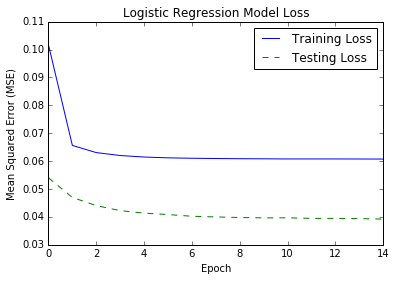

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

In [19]:
predictions = pd.DataFrame(model.predict(X_test.as_matrix()))
predictions[predictions > 0.5] = 'normal'
predictions[predictions <= 0.5] = 'anamoly'

y_test_labels = y_test.as_matrix().reshape(-1,1).copy()
y_test_labels[y_test_labels > 0.5] = 'normal'
y_test_labels[y_test_labels <= 0.5] = 'anamoly'

print 'accuracy', accuracy_score(predictions,y_test_labels)
print 'confusion matrix\n', confusion_matrix(predictions,y_test_labels)

print classification_report(predictions,y_test_labels)

/Users/macbook/anaconda/lib/python2.7/site-packages/keras/backend/theano_backend.py:527: UserWarning: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 1 is not part of the computational graph needed to compute the outputs: keras_learning_phase.
To make this warning into an error, you can pass the parameter on_unused_input='raise' to theano.function. To disable it completely, use on_unused_input='ignore'.
  **kwargs)


accuracy 0.990664383368
confusion matrix
[[ 48270   1627]
 [   679 196435]]
             precision    recall  f1-score   support

    anamoly       0.99      0.97      0.98     49897
     normal       0.99      1.00      0.99    197114

avg / total       0.99      0.99      0.99    247011



### MLP Model on the KDD Cup 1999 dataset

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

# Model
model.add(Dense(output_dim=4, input_shape=[X_train.shape[1]], 
                activation='relu', W_regularizer=l2(0.001)))
model.add(Dense(output_dim=2, 
                activation='relu', W_regularizer=l2(0.001)))
model.add(Dense(output_dim=1,
                activation='sigmoid', W_regularizer=l2(0.001)))
# Compile model
sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

In [21]:
# Fit the model
history = model.fit(X_train.as_matrix(), y_train.as_matrix().reshape(-1,1), batch_size = 256,
          nb_epoch = 15, verbose=2, validation_data=(X_test.as_matrix(),y_test.as_matrix().reshape(-1,1)))

Train on 247010 samples, validate on 247011 samples
Epoch 1/15
2s - loss: 0.1065 - val_loss: 0.0413
Epoch 2/15
1s - loss: 0.0548 - val_loss: 0.0364
Epoch 3/15
1s - loss: 0.0525 - val_loss: 0.0343
Epoch 4/15
1s - loss: 0.0492 - val_loss: 0.0330
Epoch 5/15
2s - loss: 0.0474 - val_loss: 0.0305
Epoch 6/15
1s - loss: 0.0400 - val_loss: 0.0164
Epoch 7/15
2s - loss: 0.0301 - val_loss: 0.0145
Epoch 8/15
2s - loss: 0.0291 - val_loss: 0.0138
Epoch 9/15
1s - loss: 0.0284 - val_loss: 0.0133
Epoch 10/15
1s - loss: 0.0280 - val_loss: 0.0130
Epoch 11/15
1s - loss: 0.0277 - val_loss: 0.0131
Epoch 12/15
1s - loss: 0.0275 - val_loss: 0.0128
Epoch 13/15
1s - loss: 0.0274 - val_loss: 0.0127
Epoch 14/15
2s - loss: 0.0273 - val_loss: 0.0125
Epoch 15/15
1s - loss: 0.0276 - val_loss: 0.0127


Loss after final iteration:  0.0126971618208


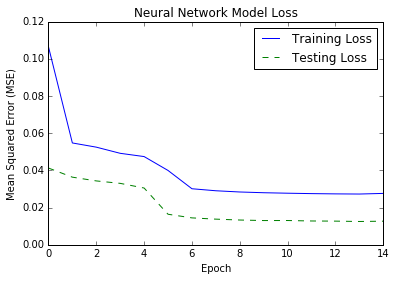

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Neural Network Model Loss')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

In [23]:
predictions = pd.DataFrame(model.predict(X_test.as_matrix()))
predictions[predictions > 0.5] = 'normal'
predictions[predictions <= 0.5] = 'anamoly'

y_test_labels = y_test.as_matrix().reshape(-1,1)
y_test_labels[y_test_labels > 0.5] = 'normal'
y_test_labels[y_test_labels <= 0.5] = 'anamoly'

print 'accuracy', accuracy_score(predictions,y_test_labels)
print 'confusion matrix\n', confusion_matrix(predictions,y_test_labels)

print classification_report(predictions,y_test_labels)

accuracy 0.996214743473
confusion matrix
[[ 48597    583]
 [   352 197479]]
             precision    recall  f1-score   support

    anamoly       0.99      0.99      0.99     49180
     normal       1.00      1.00      1.00    197831

avg / total       1.00      1.00      1.00    247011

